In [1]:
import dask.dataframe as dd
import pandas as pd
import tldextract
import time

start_time = time.time()
df = pd.read_parquet("hf://datasets/jackbandy/CC_aggregate/all_domains.parquet")
elapsed = time.time() - start_time
print(f"Took {elapsed:.2f}s")

Took 1323.54s


In [ ]:
datasets = {
    "zyda_main": "hf://datasets/nhagar/zyda_urls/**/*.parquet",
    "zyda_fwe3": "hf://datasets/nhagar/zyda-2_urls_fwe3/**/*.parquet",
    "zyda_dclm_crossdeduped": "hf://datasets/nhagar/zyda-2_urls_dclm_crossdeduped/**/*.parquet",
    "dclm_baseline_batch4": "hf://datasets/nhagar/dclm-baseline-1.0-parquet_urls/batch_4/train-*.parquet",
    "dclm_dedup": "hf://datasets/nhagar/dclm-dedup_urls/**/*.parquet",
    "falcon_refinedweb": "hf://datasets/nhagar/falcon-refinedweb_urls/batch*/train-*.parquet",
    "falcon_main": "hf://datasets/nhagar/falcon_urls/data/train-*.parquet",
    "c4_en": "hf://datasets/nhagar/c4_en_urls/data/train-*.parquet",
    "cultura": "hf://datasets/nhagar/cultura_urls/data/train-*.parquet"
}

dataframes = {}
for name, path in datasets.items():
    print(f"Loading {name}...")
    dataframes[name] = dd.read_parquet(path)

Loading zyda_main...
Loading zyda_fwe3...
Loading zyda_dclm_crossdeduped...
Loading dclm_baseline_batch4...
Loading dclm_dedup...
Loading falcon_refinedweb...
Loading falcon_main...
Loading c4_en...
Loading cultura...


In [19]:
df_top = df.head(1000000)

df_remaining = df.iloc[1000000:]
df_random = df_remaining.sample(1000000, random_state=42)  # Setting random_state for reproducibility

# Combine the datasets
df_to_filter = pd.concat([df_top, df_random], ignore_index=True)

In [20]:
memory_usage = df_to_filter.memory_usage(deep=True)
total_memory = memory_usage.sum()
print(f"Memory usage: {total_memory / 1024 / 1024:.2f} MB")

Memory usage: 160.88 MB


In [21]:
# Excluded top-level domains
excluded_tlds = {
    'gov', 'edu', 'mil', 'ru',
    'cn', 'io', 'biz', 'xyz',
    'club', 'site', 'online',
    'pro', 'store', 'me'
}

# Blog platforms
blog_platforms = [
    'blogspot', 'wordpress', 'medium',
    'tumblr', 'exblog', 'livejournal',
    'typepad', 'blogger', 'substack',
    'wixsite', 'weebly',
]

# E-commerce & commercial
commerce_terms = [
    'shop', 'store', 'buy', 'sale',
    'price', 'cart', 'checkout', 'deal',
    'market', 'mall', 'retail', 'bargain'
]

# Tech & development
tech_terms = [
    'amazonaws',
    'host', 'cloud', 'server',
    'api', 'dev', 'app', 'software',
    'code', 'script', 'github'
]

# Religious content
religious_terms = [
    'bible', 'church', 'faith',
    'christian', 'catholic', 'islam',
    'buddhist', 'hindu', 'religion',
    'spiritual', 'ministry', 'worship'
]

# Finance & banking
finance_terms = [
    'finance', 'frugal', 'money',
    'budget', 'invest', 'saving',
    'financial', 'income', 'wealth',
    'pfina', 'loan', 'mortgage',
    'banking', 'insurance', 'crypto'
]

# Adult content (regex patterns)
adult_patterns = [
    r'\d{4}\.', r'av\d', r'adult',
    r'xxx', r'porn', r'sex', r'erotic'
]

# Education-related
education_terms = [
    'learn', 'course', 'class',
    'lesson', 'tutor', 'polyglot',
    'language', 'education', 'school',
    'academy', 'college', 'training'
]

# Product creation and sales
product_terms = [
    'custom', 'product', 'design',
    'craft', 'make', 'build',
    'create', 'handmade', 'calls',
    'gear', 'accessories', 'merch'
]

# Travel & tourism
travel_terms = [
    'hotel', 'booking', 'travel',
    'vacation', 'resort', 'flight',
    'accommodation', 'tour', 'trip',
    'holiday', 'bed', 'reservation',
    'cruise'
]

# Video & streaming
video_terms = [
    'video', 'stream',
    'watch', 'vhx', 'media',
    'channel', 'player'
]

# Small businesses & personal services
small_business_terms = [
    'home', 'personal', 'family',
    'llc', 'boutique', 'studio',
    'consulting', 'services', 'solutions',
    'coaching', 'therapy', 'advisor'
]

# Forms & surveys
form_terms = [
    'form', 'survey', 'poll',
    'quiz', 'formsite', 'typeform',
    'surveymonkey', 'jotform', 'questionnaire'
]

# Credit & loan services
credit_terms = [
    'credit', 'loan', 'mortgage',
    'oferty', 'kredyt', 'finance',
    'banking', 'insurance', 'invest',
    'lend', 'borrow', 'refinance'
]

# Gaming & gambling
game_terms = [
    'game', 'juego', 'spiel',
    'jeu', 'play', 'gamer',
    'gaming', 'casino',
    'poker', 'slots', 'arcade'
]

# Health & medical
health_terms = [
    'health', 'wellness', 'medicine',
    'medical', 'fitness', 'diet',
    'nutrition', 'doctor', 'clinic',
    'hospital', 'pharma', 'therapy'
]

# Food & recipes
food_terms = [
    'recipe', 'cook', 'food',
    'kitchen', 'chef', 'cuisine',
    'meal', 'bakery', 'eat',
    'restaurant', 'menu', 'dining'
]

# Real estate & property
real_estate_terms = [
    'realestate', 'property', 'estate',
    'homes', 'rent', 'housing',
    'apartments', 'condo', 'listings',
    'realtor', 'residence', 'commercial'
]

# Jobs & career
career_terms = [
    'job', 'career', 'employment',
    'hiring', 'vacancy', 'recruit',
    'resume', 'jobs'
]

# Directories & listings
directory_terms = [
    'directory', 'list', 'index',
    'classifieds', 'yellowpages', 'businesslist',
    'aggregator', 'local'
]

# Events & ticketing
event_terms = [
    'event', 'ticket', 'concert',
    'festival', 'show', 'expo',
    'conference', 'seminar'
]

# Legal & government services
legal_terms = [
    'law', 'legal', 'attorney',
    'lawyer', 'justice', 'court',
    'litigation', 'rights'
]

# Marketing, SEO & advertising
marketing_terms = [
    'marketing', 'advertising',
    'promo', 'brand', 'agency',
    'publicity',
]

# Combine all filters efficiently
all_filters = [
    ('tld', excluded_tlds),
    ('blog_platform', blog_platforms),
    ('ecommerce', commerce_terms),
    ('tech', tech_terms),
    ('religious', religious_terms),
    ('finance', finance_terms),
    ('adult', adult_patterns),
    ('education', education_terms),
    ('product', product_terms),
    ('travel', travel_terms),
    ('video', video_terms),
    ('small_business', small_business_terms),
    ('form', form_terms),
    ('credit', credit_terms),
    ('game', game_terms),
    ('health', health_terms),
    ('food', food_terms),
    ('real_estate', real_estate_terms),
    ('career', career_terms),
    ('directory', directory_terms),
    ('event', event_terms),
    ('legal', legal_terms),
    ('marketing', marketing_terms)
]

In [30]:
import pandas as pd
import re

ORIGINAL_COUNT = len(df_to_filter)
print(f"{ORIGINAL_COUNT} rows before filters")
filtered_df = df_to_filter.copy()
filtered_df['tld'] = filtered_df['url_host_name'].str.split('.').str[-1]

removed_rows = []
mask_url_count = filtered_df['url_count'] < 3
for _, row in filtered_df[mask_url_count].iterrows():
    removed_rows.append({
        'url_host_name': row['url_host_name'],
        'removal_reason': 'url_count_less_than_3'
    })
filtered_df = filtered_df[~mask_url_count]
print(f"{len(filtered_df)} rows after url_count < 3 filter")
print(f"  {((ORIGINAL_COUNT - len(filtered_df))/ORIGINAL_COUNT)*100:.2f}% removed")

2000000 rows before filters
1644499 rows after url_count < 3 filter
  17.78% removed


In [32]:
# Exclude based on TLD
BEFORE_COUNT = len(filtered_df)

mask_tld = filtered_df['tld'].isin(excluded_tlds)
for _, row in filtered_df[mask_tld].iterrows():
    removed_rows.append({
        'url_host_name': row['url_host_name'],
        'removal_reason': f"top_level_domain_{row['tld']}"
    })
filtered_df = filtered_df[~mask_tld]

print(f"{len(filtered_df)} rows after top-level domain filter")
print(f"  {((BEFORE_COUNT - len(filtered_df))/BEFORE_COUNT)*100:.2f}% removed")

1485052 rows after top-level domain filter
  9.70% removed


In [34]:
# term-based filters
for filter_name, term_list in all_filters[1:]:
    BEFORE_COUNT = len(filtered_df)
    # For term-based filters
    pattern = '|'.join(term_list)
    mask = filtered_df['url_host_name'].str.lower().str.contains(pattern, regex=True)
    
    # Only find the specific term if there are matches
    if mask.any():
        for _, row in filtered_df[mask].iterrows():
            domain = row['url_host_name'].lower()
            
            # Find matching term (first one only)
            matched_term = None
            for term in term_list:
                if isinstance(term, str) and term.lower() in domain:
                    matched_term = term
                    break
                elif not isinstance(term, str) and re.search(term, domain):
                    matched_term = term
                    break
            
            removed_rows.append({
                'url_host_name': row['url_host_name'],
                'removal_reason': f'{filter_name}_{matched_term or "match"}'
            })
    
    filtered_df = filtered_df[~mask]
    print(f"{len(filtered_df)} rows after {filter_name} filter")
    print(f"  {((BEFORE_COUNT - len(filtered_df))/BEFORE_COUNT)*100:.2f}% removed")

# Create DataFrame of removed domains
removed_df = pd.DataFrame(removed_rows)

1410082 rows after blog_platform filter
  5.05% removed
1372929 rows after ecommerce filter
  2.63% removed
1336812 rows after tech filter
  2.63% removed
1332969 rows after religious filter
  0.29% removed
1326959 rows after finance filter
  0.45% removed
1290764 rows after adult filter
  2.73% removed
1279725 rows after education filter
  0.86% removed
1266362 rows after product filter
  1.04% removed
1245985 rows after travel filter
  1.61% removed
1223414 rows after video filter
  1.81% removed
1205955 rows after small_business filter
  1.43% removed
1201213 rows after form filter
  0.39% removed
1199987 rows after credit filter
  0.10% removed
1185029 rows after game filter
  1.25% removed
1176621 rows after health filter
  0.71% removed
1162115 rows after food filter
  1.23% removed
1156084 rows after real_estate filter
  0.52% removed
1149050 rows after career filter
  0.61% removed
1141646 rows after directory filter
  0.64% removed
1135234 rows after event filter
  0.56% remov

In [56]:
removed_df.sample(10)

,url_host_name,removal_reason
856145,naturheilpraxis-loeneke.us14.list-manage.com,directory_list
140456,rcxxy.livederby2007.com,url_count_less_than_3
3344,xja.dhadcen.com,url_count_less_than_3
610842,www.notawigshop.com,ecommerce_shop
811874,juegos-de-la-casa-de-micimau.juegosrecientes.com,game_juego
630906,developer.brewmp.com,tech_dev
902226,www.searchallproperties.com,marketing_pr
759384,amar.mizonatv.com,video_match
81206,rznzx.cnhsl.cn,url_count_less_than_3
191969,www.xjkjt.gov.cn.bryof.icu,url_count_less_than_3


In [41]:
filtered_df.sample(10)

,url_host_name,url_count,tld
599035,www.kvs.be,44446,be
1994579,d1i3g6v9s1.tian.yam.com,4,com
383324,www.fedoraquick.com,66825,com
1586262,www.fortunadudince.sk,43,sk
1110753,www.karalove.co.kr,7,kr
237990,www.pig333.com,105113,com
1045626,beijing.jwhbz.com,4,com
485712,www.animejungle.net,53716,net
1138264,hofmanns-online.eu,3,eu
510821,www.51wan.com,51321,com


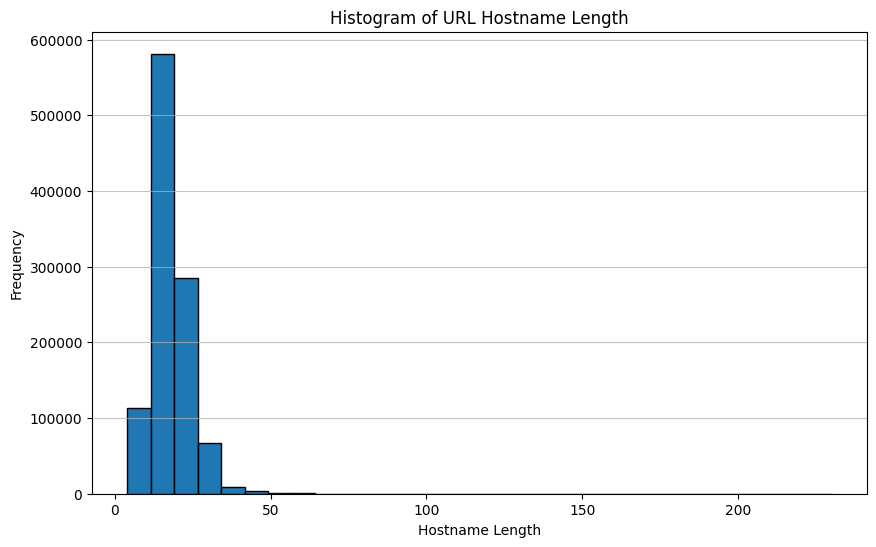

In [42]:
import matplotlib.pyplot as plt

# Calculate hostname lengths and plot histogram
filtered_df['host_name_length'] = filtered_df['url_host_name'].str.len()

plt.figure(figsize=(10, 6))
plt.hist(filtered_df['host_name_length'], bins=30, edgecolor='black')

plt.xlabel('Hostname Length')
plt.ylabel('Frequency')
plt.title('Histogram of URL Hostname Length')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [48]:
cutoff = filtered_df['host_name_length'].quantile(0.99)
print(cutoff)

36.0


In [52]:
filtered_df[filtered_df.host_name_length > 36].sample(10)

,url_host_name,url_count,tld,host_name_length
1177516,mount-pleasant-wisconsin.dbasecentral.com,4,com,41
1866715,scribblenauts-unlimited.br.jaleco.com,42,com,37
1483008,obatinsomniaakutdankronis.alternatifpengobatan...,267,com,50
691594,ec2-13-58-129-128.us-east-2.compute.amazonaws.com,39111,com,49
572696,www.bellinghampoliticsandeconomics.com,46272,com,38
310288,www.generali-berliner-halbmarathon.de,81569,de,37
1522983,nieuwerkerk-aan-den-ijssel.jouwportaal.nl,6,nl,41
1752618,wildewoodownersassociation.godaddysites.com,3,com,43
1358542,xn--mehr-gemeinntzige-wohnungen-t3c.ch,7,ch,38
1627858,nrgclicks.syncmymacs.hop.clickbank.net,4,net,38


In [51]:
len(df)

581590717

In [54]:
df.head(10).url_host_name

0             www.tumblr.com
1    www.urbandictionary.com
2         photos.smugmug.com
3           en.wikipedia.org
4              getpocket.com
5            www.youtube.com
6                  m.mlb.com
7          www.bloomberg.com
8              www.agoda.com
9          www.pinterest.com
Name: url_host_name, dtype: string

In [57]:
mapdf = pd.read_csv('../data/url_domain_mappings.csv')

In [62]:
mapdf.Domains.value_counts()

Domains
Entertainment & Culture            1594
News                               1482
Business & E-Commerce              1317
Science, Academia, & Technology     989
General Information & Education     907
Social Media/Forums                 417
Blogs                               336
Legal & Policy                      294
Other                               273
Books                               144
Name: count, dtype: int64

In [61]:
mapdf

,URL,Domains
0,www.radaronline.com,Entertainment & Culture
1,www.radaronline.com,News
2,www.tpmcafe.talkingpointsmemo.com,Legal & Policy
3,www.tpmcafe.talkingpointsmemo.com,News
4,www.medpagetoday.com,"Science, Academia, & Technology"
...,...,...
7751,www.hamsterprophet.blogspot.com,Business & E-Commerce
7752,www.bookbeat.co.uk,"Science, Academia, & Technology"
7753,www.bookbeat.co.uk,Business & E-Commerce
7754,www.monkstowngolfclub.com,Entertainment & Culture
